In [1]:
from pandas_datareader import data as wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

In [2]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.215732
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.149876
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,8.034625
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.051086
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,8.018162


In [4]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-22,138.070007,136.380005,137.289993,136.550003,5023100.0,136.550003
2020-12-23,137.550003,136.130005,137.389999,136.339996,6004200.0,136.339996
2020-12-24,138.130005,136.199997,136.199997,137.720001,2588200.0,137.720001
2020-12-28,139.389999,137.949997,138.149994,138.679993,3713700.0,138.679993
2020-12-29,139.929993,138.750000,139.220001,139.199997,1022806.0,139.199997


# Rate of return

In [5]:
PG['rate_ret'] = PG['Adj Close'] / PG['Adj Close'].shift(1) - 1
print(PG)

                  High         Low        Open       Close     Volume  \
Date                                                                    
1995-01-03   15.625000   15.437500   15.468750   15.593750  3318400.0   
1995-01-04   15.656250   15.312500   15.531250   15.468750  2218800.0   
1995-01-05   15.437500   15.218750   15.375000   15.250000  2319600.0   
1995-01-06   15.406250   15.156250   15.156250   15.281250  3438000.0   
1995-01-09   15.406250   15.187500   15.343750   15.218750  1795200.0   
...                ...         ...         ...         ...        ...   
2020-12-22  138.070007  136.380005  137.289993  136.550003  5023100.0   
2020-12-23  137.550003  136.130005  137.389999  136.339996  6004200.0   
2020-12-24  138.130005  136.199997  136.199997  137.720001  2588200.0   
2020-12-28  139.389999  137.949997  138.149994  138.679993  3713700.0   
2020-12-29  139.929993  138.750000  139.220001  139.199997  1022806.0   

             Adj Close  rate_ret  
Date           

In [6]:
# or just apply pct_change() method
# PG['Adj Close'].pct_change()

## Logarithmic rate of return

In [7]:
np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2020-12-22   -0.007079
2020-12-23   -0.001539
2020-12-24    0.010071
2020-12-28    0.006946
2020-12-29    0.003743
Name: Adj Close, Length: 6545, dtype: float64

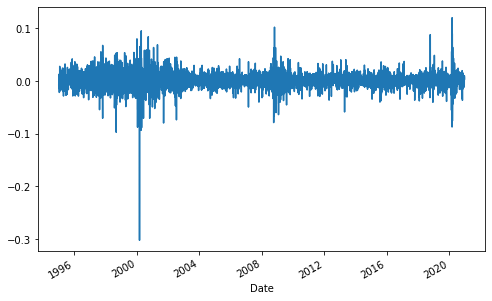

In [8]:
PG['rate_ret'].plot(figsize=(8,5))
plt.show()

### calculating mean of returns

In [9]:
PG['rate_ret'].mean()

0.0005349545915130052

### calculating mean of simple return on annual basis

In [10]:
PG['rate_ret'].mean() * 250

0.1337386478782513

Annual rate of return for (250 trading days) is around 13.3 %

### calculating logarithmic return on annual basis

In [11]:
PG['log_rate_ret'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))

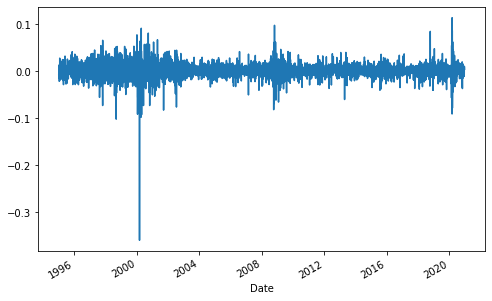

In [12]:
PG.log_rate_ret.plot(figsize=(8,5))
plt.show()

In [13]:
PG['log_rate_ret'].mean() * 250

0.10810898988839941

# it seems logarithmic returns is lower compared to simple rate of return on annual basis

# <font color='red'>  RULE!!! USE SIMPLE RATE OF RETURN FOR MULTIPLE STOCKS OVER SAME PERIOD WHEREAS LOGARITHMIC FOR ONE OR FEW STOCKS OVER MULTIPLE PERIODS </font>

In [14]:
ticker_l = ['PG', 'MSFT', 'F', 'GE']
my_data = pd.DataFrame()

for t in ticker_l:
    my_data[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [15]:
my_data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.215732,2.394761,4.242091,4.058363
1995-01-04,8.149876,2.412169,4.356228,4.058363
1995-01-05,8.034625,2.372380,4.318182,4.068309
1995-01-06,8.051086,2.412169,4.318182,4.048415
1995-01-09,8.018162,2.397249,4.394274,4.008627


In [16]:
my_data.tail()

,PG,MSFT,F,GE
Date,,,,
2020-12-22,136.550003,223.940002,8.79,10.610
2020-12-23,136.339996,221.020004,8.99,10.860
2020-12-24,137.720001,222.750000,8.86,10.650
2020-12-28,138.679993,224.960007,8.89,10.640
2020-12-29,139.199997,225.389999,8.88,10.725


In [17]:
my_data.iloc[0]

PG      8.215732
MSFT    2.394761
F       4.242091
GE      4.058363
Name: 1995-01-03 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

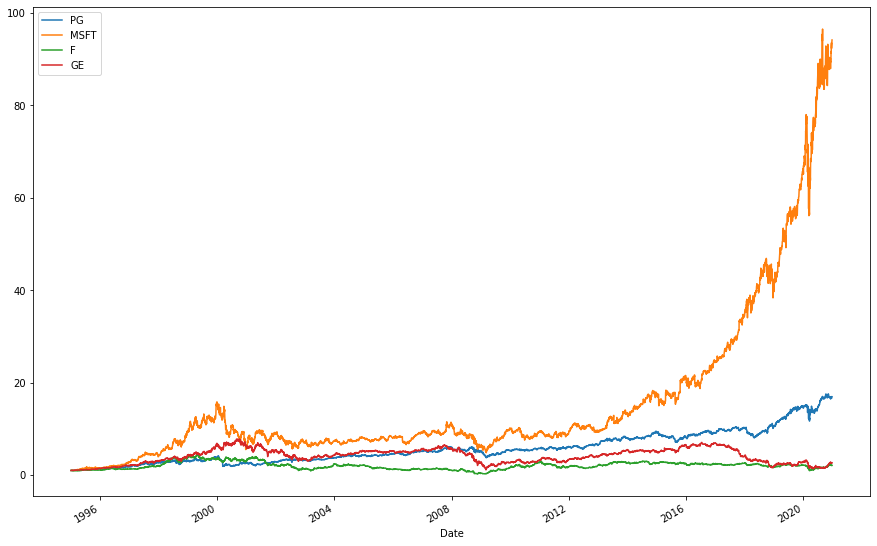

In [18]:
(my_data / my_data.iloc[0]).plot(figsize=(15,10))

### calculating simple rate of return

In [19]:
rate_return = my_data/my_data.shift(1) - 1

In [20]:
print(rate_return)

                  PG      MSFT         F        GE
Date                                              
1995-01-03       NaN       NaN       NaN       NaN
1995-01-04 -0.008016  0.007269  0.026906  0.000000
1995-01-05 -0.014141 -0.016495 -0.008734  0.002451
1995-01-06  0.002049  0.016772  0.000000 -0.004890
1995-01-09 -0.004089 -0.006185  0.017621 -0.009828
...              ...       ...       ...       ...
2020-12-22 -0.007054  0.006065 -0.015678 -0.014856
2020-12-23 -0.001538 -0.013039  0.022753  0.023563
2020-12-24  0.010122  0.007827 -0.014461 -0.019337
2020-12-28  0.006971  0.009921  0.003386 -0.000939
2020-12-29  0.003750  0.001911 -0.001125  0.007989

[6545 rows x 4 columns]


In [21]:
annual_rate = rate_return.mean() * 250

In [22]:
print(annual_rate)

PG      0.133739
MSFT    0.223630
F       0.107785
GE      0.088389
dtype: float64


In [23]:
weights = np.array([.25, .25, .25, .25])

In [24]:
portfolio1_rate_ret = np.dot(annual_rate, weights)

In [25]:
print(portfolio1_rate_ret)

0.1383855552585904


In [26]:
weights_n = np.array([.50, .40, .05, .05])
portfolio2_rate_ret = np.dot(annual_rate, weights_n)
print(portfolio2_rate_ret)

0.1661298799492975


### Market indexes

- S&P
- NASDAQ (it companies)
- Dow & Jones (only 30 large companies)

In [27]:
ticker_l = ['^GSPC', '^IXIC', '^GDAXI',] #  '^FTSE'
my_data = pd.DataFrame()

for t in ticker_l:
    my_data[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

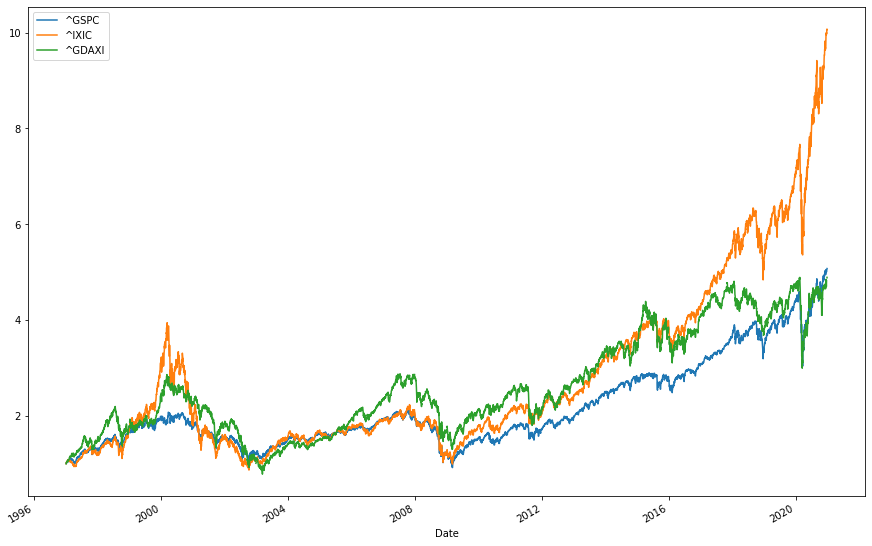

In [28]:
(my_data / my_data.iloc[0]).plot(figsize=(15,10))
plt.show()

In [29]:
rate_return = my_data/my_data.shift(1) - 1
annual_rate = rate_return.mean() * 250

In [30]:
print(annual_rate)

^GSPC     0.086667
^IXIC     0.127373
^GDAXI    0.078715
dtype: float64


# Volatility & Risk of Stock

In [126]:
ticker_l = ['PG', '^GSPC']

sec_data = pd.DataFrame()

for t in ticker_l:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

In [127]:
sec_data.head()

,PG,^GSPC
Date,,
2010-01-04,43.536560,1132.989990
2010-01-05,43.550812,1136.520020
2010-01-06,43.344254,1137.140015
2010-01-07,43.109196,1141.689941
2010-01-08,43.052197,1144.979980


In [128]:
sec_returns = np.log(sec_data /sec_data.shift(1))

In [129]:
sec_returns.head()

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004754,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878


# PG

In [130]:
sec_returns['PG'].mean() # mean return for PG on daily basis

0.00041992774152853064

In [131]:
sec_returns['PG'].mean() * 250 # mean return of PG on annual basis

0.10498193538213266

In [132]:
sec_returns['PG'].std() # standard deviation of PG on daily basis

0.010809008338339105

In [133]:
sec_returns['PG'].std() * 250 ** 0.5 # standard deviation of PG on annual basis

0.17090542798451744

# return of tickers

In [134]:
sec_returns[['PG', '^GSPC']].mean() * 250

PG       0.104982
^GSPC    0.107944
dtype: float64

# risk & volatility of tickers

In [135]:
sec_returns[['PG', '^GSPC']].std() * 250 ** 0.5

PG       0.170905
^GSPC    0.174954
dtype: float64

# Covariance & Correlation

In [136]:
sec_returns.cov()

,PG,^GSPC
PG,0.000117,0.000071
^GSPC,0.000071,0.000122


In [137]:
sec_returns.corr()

,PG,^GSPC
PG,1.000000,0.596202
^GSPC,0.596202,1.000000


In [138]:
cov = sec_returns.cov()['PG']['^GSPC']/(sec_returns['PG'].std() * sec_returns['^GSPC'].std())
print(cov)

0.596202416400858


# Portfolio Risk

## Variance

In [139]:
weights = np.array([.5, .5])

In [140]:
variance  = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))

In [141]:
print(variance)

0.02386775556644581


## Volatility

In [142]:
volatility  = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights)))**0.5

In [143]:
print(volatility)

0.15449192718859395


In [144]:
print('Volatility for Portfolio is {} %'.format(round(volatility*100, 1)))

Volatility for Portfolio is 15.4 %


# Diversifiable vs Non -Diversifiable

In [145]:
dr = variance - (weights[0]**2 * sec_returns['PG'].var()*250) - (weights[0]**2 * sec_returns['^GSPC'].var()*250)

In [146]:
print(f'Diversifiable risk is: {round(dr * 100,2)} %')

Diversifiable risk is: 0.89 %


In [147]:
ndr = variance - dr

In [148]:
print(f'Non - Diversifiable risk is: {round(ndr * 100,2)} %')

Non - Diversifiable risk is: 1.5 %


# Univariate Linear Regression

In [149]:
df = pd.read_excel('6.2 Housing.xlsx.xlsx')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   House Price           20 non-null     int64 
 1   House Size (sq.ft.)   20 non-null     int64 
 2   State                 20 non-null     object
 3   Number of Rooms       20 non-null     int64 
 4   Year of Construction  20 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 928.0+ bytes


In [151]:
X = df['House Size (sq.ft.)']
y= df['House Price']

In [152]:
X1 = sm.add_constant(X)

reg = sm.OLS(y, X1).fit()

In [153]:
X1

,const,House Size (sq.ft.)
0,1.0,1940
1,1.0,1300
2,1.0,1420
3,1.0,1680
4,1.0,1270
5,1.0,1850
6,1.0,1000
7,1.0,1100
8,1.0,1600
9,1.0,1000


In [154]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           8.13e-06
Time:                        20:11:16   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9

# using stats from scipy

In [155]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [156]:
print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r_value: {r_value **2}')
print(f'p_value: {p_value}')
print(f'std_err: {std_err}')

slope: 401.91628631922595
intercept: 260806.2360560964
r_value: 0.678279986579124
p_value: 8.129642377231308e-06
std_err: 65.24299510636492


# Markowitz Portfolio Optimization

In [159]:
portfolio = ['PG', '^GSPC']

In [160]:
weights = np.random.random(len(portfolio))
weights /= sum(weights)
weights

array([0.7995275, 0.2004725])

### running 1k iterations to plot Markowitz's Efficient Frontier 

In [161]:
port_return_l = []
port_volatility_l = []

for i in range(1000):
    weights = np.random.random(len(portfolio))
    weights /= sum(weights)
    
    # calculating portfolio return
    port_return = np.dot(weights, sec_returns.mean()) * 250  
    
    # calculating portfolio volatility
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(sec_returns.cov()*250, weights)))
    
    port_return_l.append(port_return)
    port_volatility_l.append(port_volatility)
    
port_return_ar = np.array(port_return_l)
port_volatility_ar = np.array(port_volatility_l)

In [162]:
sec_returns.cov()

,PG,^GSPC
PG,0.000117,0.000071
^GSPC,0.000071,0.000122


In [163]:
port_data = pd.DataFrame({'Return': port_return_ar, 'Risk' : port_volatility_ar})

In [164]:
port_data

,Return,Risk
0,0.107172,0.159964
1,0.106875,0.156622
2,0.105755,0.157843
3,0.106204,0.154693
4,0.106182,0.154766
...,...,...
995,0.107583,0.166893
996,0.106763,0.155751
997,0.105800,0.157371
998,0.106660,0.155139


<AxesSubplot:xlabel='Risk', ylabel='Return'>

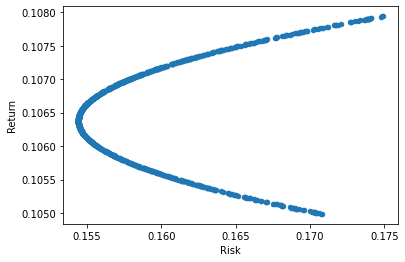

In [165]:
port_data.plot(x='Risk',y='Return', kind='scatter')